In [1]:
import sys
import os
import pandas as pd
import numpy as np

stdout = sys.stdout
reload(sys)
sys.setdefaultencoding('utf-8')
sys.stdout = stdout

In [ ]:
# save the new results
output_filename = "realDonaldTrump_tweets_analyzed.csv"
output_path = os.path.join(os.path.expanduser("~"), "TrumpTwitterAnalysis", "Data", output_filename)
tweets_pd.to_csv(output_path, encoding='utf-8', index=False)

In [ ]:
# use only the twitter texts to train a word2vec model
from basic_analysis import filter_set
m2vmethod = 1  # methodType: 0: CBOW; 1: skip-gram
epoch = 40
nFeatures = 500
token_texts = [text.split() for text in texts if len(text) > 0]
#token_texts = [text for text in texts]
#w2v_Trump = w2v_analyzer.w2v_analyzer(token_texts, m2vmethod, nFeatures, epoch, filter_set)
#w2v_Trump.fit(token_texts)

from gensim.models import Word2Vec
w2v_Trump = Word2Vec(token_texts, sg=m2vmethod, iter=40, size=nFeatures, min_count=1, window=5, workers=2)

#w2v_Trump.wv['vote']
w2v_Trump.wv.most_similar(positive=['hillary'])

In [ ]:
nTopics = 20
nCluster = 1000
max_ngram = 1

## read LDA
from feature_extraction import *
from decomposition_analysis import *
LDApickle_filename = 'LDAdata_' + str(nTopics) + 'topics_'+ str(nCluster) + 'clusters_' + str(max_ngram) + 'ngram.pkl'
LDApickle_path = os.path.join(os.path.expanduser("~"), "TrumpTwitterAnalysis", "Pickles", LDApickle_filename)
(extractor_LDAex, X_LDAex, featureNames_LDAex, X_trans, analyzer) = pd.read_pickle(LDApickle_path)

In [ ]:
import pyLDAvis, pyLDAvis.sklearn
pyLDAvis.enable_notebook()
data_pyLDAvis = pyLDAvis.sklearn.prepare(analyzer, X_LDAex, extractor_LDAex)
#pyLDAvis.show(data_pyLDAvis)
pyLDAvis.display(data_pyLDAvis, True)

In [ ]:
def get_decompositionResult(model, featureNames):
    nTopics = model.components_.shape[0]
    results0_featurename = list()
    results0_possiblity = list()
    topics_freq = np.zeros(nTopics)
    for iTopic, topic in enumerate(model.components_):
        topics_freq[iTopic] = np.sum(topic)
        topic_featurename = list()
        topic_possiblity = list()
        for i in topic.argsort()[:-len(featureNames)-1:-1]:
            topic_featurename.append(featureNames[i])
            topic_possiblity.append(topic[i])

        results0_featurename.append(topic_featurename)
        results0_possiblity.append(topic_possiblity)

    results_featurename = list()
    results_possiblity = list()
    for iTopic in topics_freq.argsort()[:-nTopics-1:-1]:
        results_featurename.append(results0_featurename[iTopic])
        results_possiblity.append(results0_possiblity[iTopic])
    
    return results_featurename, results_possiblity

In [ ]:
LDAresults_featurename, LDAresults_possiblity = get_decompositionResult(analyzer, featureNames_LDAex)

nWords_show = 20
for iTopic in range(nTopics):
    print 'Topic%d' % iTopic
    print " ".join(LDAresults_featurename[iTopic][0:nWords_show])
    #print LDAresults_possiblity[iTopic][0:nWords_show]

In [ ]:
from basic_analysis import filter_set
from w2v_analyzer import w2v_analyzer

w2vSource = 'GoogleNews'
m2vmethod = 1  # methodType: 0: CBOW; 1: skip-gram
w2vAnalyzer = w2v_analyzer(w2vSource, m2vmethod, 300, 40, filter_set)

In [99]:
# Topic keywords
myTopics = list()
# Topic 1
myTopics.append(['hillary', 'clinton', 'crooked', 'bernie', 'obama', 'years', 'campaign', 'bad'])
# Topic 2
myTopics.append(['fake', 'news', 'dishonest', 'media', 'failing', 'big', 'story', 'said'])
# Topic 3
myTopics.append(['make', 'america', 'great', 'again', 'together', 'we', 'american', 'people'])
# Topic 4
myTopics.append(['white', 'house', 'great', 'day', 'honor', 'today', 'meeting', 'senator'])
# Topic 5
myTopics.append(['obamacare', 'repeal', 'replace', 'disaster', 'crazy', 'bill', 'failed', 'reform'])
# Topic 6
myTopics.append(['join', 'live', 'rally', 'tomorrow', 'tonight', 'tickets', 'today', 'speech'])
# Topic 7
myTopics.append(['korea', 'north', 'south', 'china', 'trade', 'deficit', 'problem', 'president'])
# Topic 8
myTopics.append(['law', 'enforcement', 'officers', 'police', 'executive', 'order', 'killed', 'victims'])
# Topic 9
myTopics.append(['trump', 'vote', 'poll', 'team', 'voters', 'final', 'americans', 'debate'])
# Topic 10
myTopics.append(['jobs', 'bring', 'back', 'dollars', 'optimism', 'economic', 'market', 'companies'])
# Topic 11
myTopics.append(['enjoy', 'interviewed', 'tonight', 'looking', 'forward', 'interview', 'prime', 'minister'])
# Topic 12
myTopics.append(['heroes', 'veterans', 'honor', 'today', 'act', 'announced', 'american', 'lives'])
# Topic 13
myTopics.append(['islamic', 'terror', 'radical', 'ban', 'tough', 'allowed', 'border', 'immigration'])
# Topic 14
myTopics.append(['fbi', 'russia', 'cia', 'emails', 'director', 'illegally', 'investigation', 'server'])
# Topic 15
myTopics.append(['mexico', 'wall', 'pay', 'trade', 'deficit', 'plant', 'crime', 'deal'])
# Topic 16
myTopics.append(['syria', 'ISIS', 'syrian', 'refugees', 'immigrants', 'putin', 'rebels', 'ceasefire'])

myTopicsNames = ['HRC', 'fakeNews', 'MAGA', 'whitehouse', 'healthcare', 'join', 'korea&china', 'police', 'vote', 'jobs',
                'interview', 'veterans', 'terror', 'fbi', 'mexico', 'refugee']

nMyTopics = len(myTopicsNames)

In [ ]:
for i, theTopic in enumerate(myTopics):
    for keyword in theTopic:
        try:
            wv = w2vAnalyzer.model.wv[keyword]
        except KeyError:
            print 'In Topic' + str(i+1) + ', keyword: ' + keyword + ' not found in w2v vocabulary!'

In [3]:
'''
read data
'''
input_filename = "realDonaldTrump_tweets_analyzed.csv"
input_path = os.path.join(os.path.expanduser("~"), "TrumpTwitterAnalysis", "Data", input_filename)
tweets_pd = pd.read_csv(input_path)

In [ ]:
# 242, 467, 490
irow = 296
print tweets_pd.iloc[irow]['text']
print tweets_pd.iloc[irow]['normalText']
print tweets_pd.iloc[irow][myTopicsNames]
print tweets_pd.iloc[irow][[topicName+'_trans' for topicName in myTopicsNames]]

In [4]:
simu = tweets_pd[myTopicsNames].values
simu_trans = tweets_pd[[topicName+'_trans' for topicName in myTopicsNames]].values

In [ ]:
from datetime import date, timedelta
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

#prop_cycle = plt.rcParams['axes.prop_cycle']
#colors = prop_cycle.by_key()['color']

from colors import cdict
colorNames = ['blue', 'black', 'red', 'brown', 'cyan', 'orange', 'skyblue', 'purple', 'tomato', 'yellow',
              'tan', 'magenta', 'green', 'darkblue', 'yellowgreen', 'gray']
colors = [cdict[cn] for cn in colorNames]

In [ ]:
import time

dates = []
dates_day = []
simu_dates = []
nTweets_date = []
lastDate = date(2000, 1, 1)
nDays = 0
simu_trans_valid = None
for irow, row in tweets_pd.iterrows():
    if row['w2vTokens_count'] == 0:
        continue
    theDate = date(row['created_y'], row['created_m'], 1)  # row['created_d']
    if simu_trans_valid is None:
        simu_trans_valid = simu_trans[irow].reshape(1, -1)
    else:
        simu_trans_valid = np.vstack((simu_trans_valid, simu_trans[irow].reshape(1, -1)))

    if theDate != lastDate:
        nDays += 1
        dates.append(theDate)
        nTweets_date.append(1)
    else:
        nTweets_date[-1] += 1

    lastDate = theDate

print np.mean(simu_trans_valid, axis=0)

In [ ]:
# form days during the simulation period
dates_day.append(dates[0])
for i, theDate in enumerate(dates):
    for d in range(30, 1, -1):
        if theDate.month == 2 and d >= 29:
            continue
        theDate_day = date(theDate.year, theDate.month, d)
        if theDate_day < dates[0] and theDate_day > dates[-1]:
            dates_day.append(theDate_day)
dates_day.append(dates[-1])

ts_month = [time.mktime(theDate.timetuple()) for theDate in dates]
ts_day = [time.mktime(theDate_day.timetuple()) for theDate_day in dates_day]

irow = 0
for nTweets_day in nTweets_date:
    dateSimu = np.mean(simu_trans_valid[irow:irow + nTweets_day], axis=0)
    irow += nTweets_day
    simu_dates.append(dateSimu)
simu_dates = np.array(simu_dates)
assert irow == simu_trans_valid.shape[0]
assert len(nTweets_date) == simu_dates.shape[0]

from sklearn.preprocessing import scale
simu_dates = scale(simu_dates, axis=0, with_mean=True, with_std=True, copy=False)

In [ ]:
from scipy.interpolate import interp1d

#plt.figure(1, figsize=(20, 10))
plt.figure(1, figsize=(24, 8))
#ax = plt.subplot(1, 1, 1)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# group the topics to show clearly
#kind_set = [[0, 2, 5, 8], [1, 3, 10, 13], [4, 7, 9, 11], [6, 12, 14, 15]]
#kind_set = [[0, 1, 9, 6], [2, 10, 4, 12], [5, 3, 7, 14], [8, 13, 11, 15]]
kind_set = [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]

myTopicsNames_rearrange = list()
for ks in kind_set:
    for k in ks:
        myTopicsNames_rearrange.append(myTopicsNames[k])
ls = list()
for k, ks in enumerate(kind_set):
    ax = plt.subplot(len(kind_set), 1, k+1)
    for j in range(nMyTopics):
        if j in ks:
            # plt.plot(dates, simu_dates[:, j], color=colors[j], label=myTopicsNames[j])
            #ax.scatter(dates, simu_dates[:, j], color=colors[j])

            f = interp1d(ts_month, simu_dates[:, j], kind='zero')  # kind='zero' 'nearest' 'slinear' 'quadratic'
            l, = ax.plot(dates_day, f(ts_day), color=colors[j], linewidth=3)  #
            ls.append(l)
            plt.xlim((dates_day[-1]+timedelta(days=-2), dates_day[0]+timedelta(days=2)))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
    ax.titlesize = 12

    dates_forward = dates
    dates_forward.reverse()
    ax.set_xticks(dates_forward)
    ax.set_xticklabels(dates_forward, rotation=90)
    plt.ylim((-2.5, 3.0))
    plt.ylabel('\'Hotness\'', color='black')  # , fontweight='bold'
plt.legend(ls, myTopicsNames_rearrange, bbox_to_anchor=(1.13, 4.65), ncol=1, fontsize=10, labelspacing=1.5, frameon=False)
#plt.legend(ls, myTopicsNames_rearrange, bbox_to_anchor=(1.13, 4.65), ncol=1, fontsize=12, labelspacing=1.0, frameon=False)
plt.gcf().autofmt_xdate()
#plt.savefig("topics_time.png")

plt.show()

In [ ]:
irow = 15
print dates[len(dates)-1-irow]
print simu_dates[len(dates)-1-irow]

In [ ]:
# given a Topic, list the most similar tweets in a specific month
y = 2017
m = 6
iTopic = 8
print 'For Topic [' + myTopicsNames[iTopic-1] + ']:'
tweets_month = tweets_pd[(tweets_pd['created_y'] == y) & (tweets_pd['created_m'] == m)]
text_month = tweets_month['normalText'].values
simu_month = tweets_month[myTopicsNames[iTopic-1]+'_trans'].values
sorted_simu_month = simu_month.argsort()[:-len(simu_month)-1:-1]
sorted_text_month = [text_month[i] for i in sorted_simu_month]
#[str(topic[i]) + '*' + featureNames[i] for i in topic.argsort()[:-n_top_words-1:-1]]

for i in range(min(15, len(tweets_month))):
    print sorted_text_month[i], simu_month[sorted_simu_month[i]]
    print str(y)+'-'+str(m)+'-'+str(tweets_month.iloc[sorted_simu_month[i]]['created_d']), str(tweets_month.iloc[sorted_simu_month[i]]['created_h']) + ':' + str(tweets_month.iloc[sorted_simu_month[i]]['created_min'])

In [58]:
# extract data
nTweets_full = 3553

X0 = None
Y = None
sources = list()
for irow, row in tweets_pd.iterrows():
    if row['w2vTokens_count'] == 0 or irow >= nTweets_full:
        continue

    rX = row[[topicName + '_trans' for topicName in myTopicsNames]].values.reshape(1, -1)
    rY = row[['favorite_count', 'retweet_count']].values.reshape(1, -1)
    sources.append(row['source'])
    if X0 is None:
        X0 = rX
        Y = rY
    else:
        X0 = np.vstack((X0, rX))
        Y = np.vstack((Y, rY))
nD = X.shape[0]

In [32]:
y = Y[:, 0]
from transformers import LabelConverter
label = LabelConverter().fit_transform(y)

In [33]:
from sklearn.preprocessing import StandardScaler
X1 = StandardScaler().fit_transform(X0)
from transformers import FilterSimu
X = FilterSimu(0.99).fit_transform(X1)

In [34]:
print X0.shape
print Y.shape

(3175, 16)
(3175, 2)


In [35]:
from sklearn.svm import LinearSVC
rng = np.random.RandomState(1)
p = 'l2'
C = 1.0
classifier = LinearSVC(penalty=p, loss='squared_hinge', dual=False, tol=0.0001, C=C, multi_class='ovr',
                               fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=rng,
                               max_iter=1000)
classifier.fit(X, label)
label_pred = classifier.predict(X)
score = classifier.score(X, label)
print classifier.coef_
print classifier.intercept_
print score

[[-0.53607688  0.25663024 -0.06325712  0.04387922  0.13608607 -0.53475914
   0.10335555 -0.03811388 -0.26893384  0.0312349  -0.2007213   0.173094
   0.13932181  0.205325   -0.06063418  0.03015919]]
[-0.06099464]
0.651338582677


In [19]:
test_X = np.zeros((1,16))
test_X[0, 9] = 1
print classifier.predict(test_X)

[0]


In [40]:
from sklearn.linear_model import LinearRegression
for i in range(nMyTopics):
    print myTopicsNames[i]
    LRtopic = LinearRegression().fit(X1[:, i].reshape(-1, 1), label)
    print LRtopic.coef_, LRtopic.intercept_
    print LRtopic.score(X1[:,i].reshape(-1, 1), label)

HRC
[-0.22031665] 0.460745440127
0.0326535297797
fakeNews
[ 0.16989467] 0.390711389606
0.0147784373715
MAGA
[ 0.01998101] 0.411877394636
0.000240492295811
whitehouse
[ 0.02817847] 0.410578386606
0.000466256291735
healthcare
[ 0.11251595] 0.402072909221
0.00545499651188
join
[-0.26088893] 0.445671535447
0.0287196244249
korea&china
[ 0.07327618] 0.407170749024
0.00221193687246
police
[ 0.06224457] 0.407885304659
0.00169998482366
vote
[-0.13846347] 0.435406698565
0.00974546920028
jobs
[ 0.05901142] 0.408556149733
0.00147633161768
interview
[-0.12215893] 0.430053667263
0.00647430395098
veterans
[ 0.06068304] 0.408590699326
0.00151698685484
terror
[ 0.11422889] 0.402625044342
0.00534901981016
fbi
[ 0.0462271] 0.40796393689
0.00119205385643
mexico
[ 0.02330217] 0.413179916318
0.000195293337306
refugee
[ 0.04828732] 0.410292562566
0.000913312615952


In [41]:
print X

[[ 0.  1.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 1.  0.  0. ...,  1.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [46]:
nz= np.nonzero(X)
print nz[0]
print nz[1]
print nz[0].shape
print nz[1].shape

[   0    0    1 ..., 3174 3174 3174]
[ 1  9  0 ...,  5 11 12]
(6795,)
(6795,)


In [48]:
nz_row, nz_col = np.nonzero(X)

In [171]:
counts = np.zeros((2, nMyTopics))
num_counts = np.zeros(nMyTopics)

for i in range(nz_row.shape[0]):
    num_counts[nz_col[i]] += 1
    counts[0, nz_col[i]] += Y[nz_col[i], 0]
    counts[1, nz_col[i]] += Y[nz_col[i], 1]
counts[0, :] /= num_counts
counts[1, :] /= num_counts
for j in range(nMyTopics):
    line = myTopicsNames[j] + ': ave_favorite = ' + str(counts[0, j]) 
    line += '; ave_retweet = ' + str(counts[1, j])
    line += '; retweet/favorite rate = ' + str(counts[1, j]/counts[0, j])
    print line

HRC: ave_favorite = 43818.0; ave_retweet = 10732.0; retweet/favorite rate = 0.2449221781
fakeNews: ave_favorite = 56288.0; ave_retweet = 14424.0; retweet/favorite rate = 0.256253553155
MAGA: ave_favorite = 40420.0; ave_retweet = 10064.0; retweet/favorite rate = 0.248985650668
whitehouse: ave_favorite = 81288.0; ave_retweet = 18023.0; retweet/favorite rate = 0.221717842732
healthcare: ave_favorite = 77913.0; ave_retweet = 13846.0; retweet/favorite rate = 0.177711036669
join: ave_favorite = 70703.0; ave_retweet = 16296.0; retweet/favorite rate = 0.230485269366
korea&china: ave_favorite = 46839.0; ave_retweet = 13097.0; retweet/favorite rate = 0.27961741284
police: ave_favorite = 104106.0; ave_retweet = 16077.0; retweet/favorite rate = 0.154429139531
vote: ave_favorite = 80555.0; ave_retweet = 14227.0; retweet/favorite rate = 0.176612252498
jobs: ave_favorite = 101367.0; ave_retweet = 23200.0; retweet/favorite rate = 0.228871328933
interview: ave_favorite = 126254.0; ave_retweet = 35167.0

In [86]:
# source analysis
from collections import Counter
sources_counter =  Counter(sources)
print sources_counter

cs = sources_counter.values()
cs = [100*c/float(sum(cs)) for c in cs]
for s, c in zip(sources_counter.keys(), cs):
    print s + ": " + str(c)
#for s, c in sourcers_counter.items():
    
set_sources = set(sources)
list_sources = list(set_sources)
dict_sources = {s: i for i, s in enumerate(list_sources)}
print list_sources
print dict_sources
#label_source = [dict_sources[source] for source in sources]
#label_source = np.array(label_source).reshape(-1, 1)

Counter({'Twitter for iPhone': 1916, 'Twitter for Android': 998, 'Twitter Web Client': 153, 'Media Studio': 57, 'Twitter Ads': 31, 'Twitter for iPad': 18, 'Instagram': 1, 'Periscope': 1})
Twitter for iPad: 0.566929133858
Instagram: 0.0314960629921
Media Studio: 1.79527559055
Twitter Ads: 0.976377952756
Twitter for iPhone: 60.3464566929
Periscope: 0.0314960629921
Twitter Web Client: 4.8188976378
Twitter for Android: 31.4330708661
['Twitter for iPad', 'Instagram', 'Media Studio', 'Twitter Ads', 'Twitter for iPhone', 'Periscope', 'Twitter Web Client', 'Twitter for Android']
{'Twitter for iPad': 0, 'Instagram': 1, 'Media Studio': 2, 'Twitter Ads': 3, 'Twitter for iPhone': 4, 'Periscope': 5, 'Twitter for Android': 7, 'Twitter Web Client': 6}


In [87]:
counts_source = np.zeros((len(set_sources), nMyTopics))
for i in range(nz_row.shape[0]):
    source = sources[nz_row[i]]
    counts_source[dict_sources[source], nz_col[i]] += 1
counts_source /= np.sum(counts_source, axis=0)

rows_show = [0, 2, 3, 4, 6, 7]
list_sources_show = [source for i, source in enumerate(list_sources) if i in rows_show]
counts_source_show = counts_source[rows_show]
for j in range(nMyTopics):
    print myTopicsNames[j]
    for i in range(counts_source_show.shape[0]):
        print list_sources_show[i] + ': ' + str(100*counts_source_show[i, j])

HRC
Twitter for iPad: 0.459418070444
Media Studio: 0.459418070444
Twitter Ads: 0.0
Twitter for iPhone: 50.0765696784
Twitter Web Client: 7.96324655436
Twitter for Android: 40.8882082695
fakeNews
Twitter for iPad: 0.4329004329
Media Studio: 0.865800865801
Twitter Ads: 0.21645021645
Twitter for iPhone: 46.7532467532
Twitter Web Client: 4.11255411255
Twitter for Android: 47.619047619
MAGA
Twitter for iPad: 1.2389380531
Media Studio: 3.00884955752
Twitter Ads: 2.12389380531
Twitter for iPhone: 57.6991150442
Twitter Web Client: 4.77876106195
Twitter for Android: 31.1504424779
whitehouse
Twitter for iPad: 1.64533820841
Media Studio: 3.47349177331
Twitter Ads: 2.74223034735
Twitter for iPhone: 61.2431444241
Twitter Web Client: 3.10786106033
Twitter for Android: 27.7879341865
healthcare
Twitter for iPad: 0.26525198939
Media Studio: 0.79575596817
Twitter Ads: 0.26525198939
Twitter for iPhone: 61.5384615385
Twitter Web Client: 3.97877984085
Twitter for Android: 33.1564986737
join
Twitter for iPa

In [81]:
print counts_source
print dict_sources
print list_sources

[[ 0.00459418  0.004329    0.01238938  0.01645338  0.00265252  0.00543478
   0.          0.0025974   0.00218341  0.00540541  0.01315789  0.00558659
   0.00561798  0.00389864  0.          0.        ]
 [ 0.00153139  0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.00459418  0.00865801  0.0300885   0.03473492  0.00795756  0.02445652
   0.01675978  0.02857143  0.01746725  0.01621622  0.01315789  0.0726257
   0.01685393  0.00974659  0.01302932  0.01183432]
 [ 0.          0.0021645   0.02123894  0.0274223   0.00265252  0.00815217
   0.01117318  0.01558442  0.00436681  0.01621622  0.          0.04748603
   0.00280899  0.00584795  0.          0.        ]
 [ 0.5007657   0.46753247  0.57699115  0.61243144  0.61538462  0.75543478
   0.6424581   0.57922078  0.58733624  0.62972973  0.67894737  0.63687151
   0.55337079  0.61988304  0.59283388  0.55621302]
 [ 0.          0.     

In [82]:
from operator import itemgetter
print sorted(dict_sources, key=itemgetter(1))

['Media Studio', 'Periscope', 'Instagram', 'Twitter for iPad', 'Twitter Ads', 'Twitter for iPhone', 'Twitter for Android', 'Twitter Web Client']


In [170]:
# time analysis
delta_hour = 1
hours_grid = np.linspace(0, 24-delta_hour, 24/delta_hour)
hours_grid = [int(h) for h in hours_grid]
nhgrid = len(hours_grid)

count_times = np.zeros(nhgrid)
topic_times = np.zeros((nhgrid, nMyTopics))
for irow, row in tweets_pd.iterrows():
    if row['w2vTokens_count'] == 0 or irow >= nTweets_full:
        continue  

    h = row['created_h']
    ih = nhgrid-1
    for i in range(nhgrid-1):
        if h >= hours_grid[i] and h < hours_grid[i+1]:
            ih = i
            break
    count_times[ih] += 1
    
    for j, topicName in enumerate(myTopicsNames):
        topic_times[ih, j] += row[topicName + '_trans']
print count_times
count_times /= sum(count_times)

# calculate the relative strength
for j in range(nMyTopics):
    topic_times[:, j] /= count_times

# normalize
from sklearn.preprocessing import normalize
topic_times = normalize(topic_times, norm='l1', axis=0)

[ 146.  190.  206.   95.   57.   19.    9.    9.    4.   16.  125.  227.
  301.  280.  167.  110.  123.  132.  125.  138.  167.  189.  194.  146.]


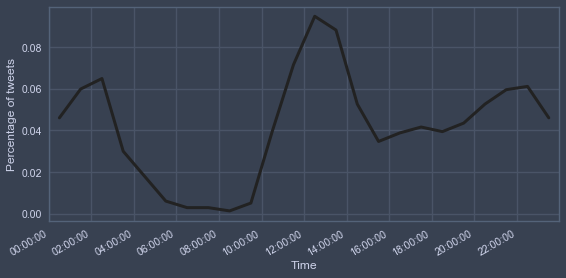

In [166]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from datetime import time
x_times = list()
for i in range(nhgrid):
    x_times.append(time(hours_grid[i], 30, 0))

delta_ticks = 2
hours_ticks = np.linspace(0, 24-delta_ticks, 24/delta_ticks)
xtick_times = [time(int(h), 0, 0) for h in hours_ticks]

plt.figure()
ax1 = plt.subplot(1, 1, 1)
plt.plot(x_times, count_times, '-k', linewidth=3)
ax1.set_xticks(xtick_times)
plt.xlim((time(0, 0, 0), time(23, 59, 59)))
plt.xlabel('Time')
plt.ylabel('Percentage of tweets')
plt.gcf().autofmt_xdate()
plt.show()

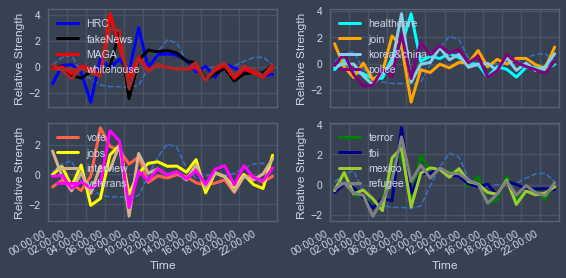

In [169]:
from colors import cdict
colorNames = ['blue', 'black', 'red', 'brown', 'cyan', 'orange', 'skyblue', 'purple', 'tomato', 'yellow',
              'tan', 'magenta', 'green', 'darkblue', 'yellowgreen', 'gray']
colors = [cdict[cn] for cn in colorNames]

kind_set = [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11], [12, 13, 14, 15]]
myTopicsNames_rearrange = list()
for ks in kind_set:
    for k in ks:
        myTopicsNames_rearrange.append(myTopicsNames[k])

from sklearn.preprocessing import scale
count_times_std = scale(count_times.reshape(-1, 1), axis=0)
topic_times_std = scale(topic_times, axis=0)

plt.figure()
for k, ks in enumerate(kind_set):
    ax = plt.subplot(2, 2, k+1)
    ax.plot(x_times, count_times_std, '--')
    for j in range(nMyTopics):
        if j in ks:
            #ax.plot(x_times, topic_times[:, j], color=colors[j], linewidth=3, label=myTopicsNames[j])
            ax.plot(x_times, topic_times_std[:, j], color=colors[j], linewidth=3, label=myTopicsNames[j])
    ax.set_xticks(xtick_times)
    ax.legend()
    plt.xlim((time(0, 0, 0), time(23, 59, 59)))
    plt.xlabel('Time')
    plt.ylabel('Relative Strength')
    plt.gcf().autofmt_xdate()

plt.show()

In [161]:
print np.mean(count_times_std), np.std(count_times_std)

5.55111512313e-17 1.0


In [162]:
print count_times_std

[[ 0.16851309]
 [ 0.709394  ]
 [ 0.90607797]
 [-0.45841706]
 [-0.92554149]
 [-1.39266591]
 [-1.51559339]
 [-1.51559339]
 [-1.57705713]
 [-1.42954416]
 [-0.08963462]
 [ 1.16422568]
 [ 2.07388903]
 [ 1.81574133]
 [ 0.4266608 ]
 [-0.27402584]
 [-0.11422012]
 [-0.00358538]
 [-0.08963462]
 [ 0.0701711 ]
 [ 0.4266608 ]
 [ 0.69710125]
 [ 0.75856499]
 [ 0.16851309]]
